Running simulation: 100%|████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 67.70 Steps/s]


<IPython.core.display.Javascript object>


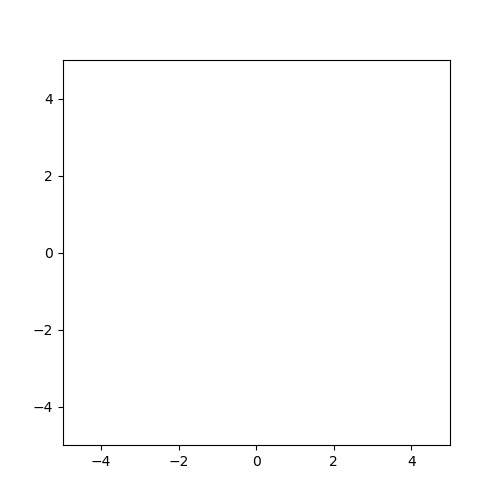

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=0.3,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
"""simulation"""
def RunSimulation1(t,Wall):
    
    r0 = np.array([0.1,0.1])
    v0 = np.array([1.,5.])
    a0 = np.array([0.,0])

    p1 = Particle(r0,v0,a0,t)

    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p1.Evolution(it)
        p1.CheckLimits(Wall_)
    
    return p1
def RunSimulation2(t,Wall):
    
    r0 = np.array([0.1,0.1])
    v0 = np.array([4.,2.])
    a0 = np.array([0.,0])

    p1 = Particle(r0,v0,a0,t)

    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p1.Evolution(it)
        p1.CheckLimits(Wall_)
    
    return p1

"""limits"""
Limits = np.array([[-5.,5.],[-5.,5.]])

"""parametros"""
dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
Particles = RunSimulation1(t,Limits)
particle_2= RunSimulation2(t,Limits)
scale = 1
t = t[::scale]

"""anim"""
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x = Particles.GetPosition(scale)[i,0]
    y = Particles.GetPosition(scale)[i,1]
    vx = Particles.GetVelocity(scale)[i,0]
    vy = Particles.GetVelocity(scale)[i,1]
    
    x = Particle_2.GetPosition(scale)[i,0]
    y = Particle_2.GetPosition(scale)[i,1]
    vx = Particle_2.GetVelocity(scale)[i,0]
    vy = Particle_2.GetVelocity(scale)[i,1]
    
    circle = plt.Circle((x,y),Particles.radius, fill=True, color='k')
    
    circle2 = plt.Circle((x,y),Particle_2.radius, fill=True, color='k')
    
    ax.add_patch(circle)
    ax.add_patch(circle2)
    
    ax.arrow(x,y,vx,vy,color='r',head_width=0.2,length_includes_head=True)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

"""end"""
Writer = anim.writers['ffmpeg']
fps = (1./dt) / scale
writer_ = Writer(fps=fps, metadata=dict(artist='Me'))